In [111]:
import os
import numpy as np
import pandas as pd
import collections
import random
import pprint
import time
import matplotlib.pyplot as plt
import choix

In [112]:
pairwise_csv = 'pairwise_annot.csv'

In [115]:
df = pd.read_csv(pairwise_csv, index_col=0)

In [116]:
df

image1           image2  win1  win2  tie
0      train-15942.jpg  train-23543.jpg     1     9    0
1      train-23505.jpg   test-05395.jpg     7     3    0
2      train-17826.jpg  train-31215.jpg     6     4    0
3       test-01855.jpg  train-10239.jpg    10     0    0
4      train-24501.jpg   test-01021.jpg     9     0    1
5      train-22592.jpg  train-03103.jpg     6     0    4
6      train-08740.jpg   test-08082.jpg     1     8    1
7      train-07350.jpg  train-09857.jpg     1     9    0
8      train-08940.jpg  train-23370.jpg     1     9    0
9       test-04746.jpg  train-25230.jpg     6     4    0
10      test-03536.jpg  train-20793.jpg     1     9    0
11     train-21807.jpg  train-21064.jpg     9     0    1
12     train-31186.jpg  train-06488.jpg     7     3    0
13     train-05418.jpg  train-20512.jpg     9     1    0
14     train-27441.jpg  train-06465.jpg     4     6    0
15     train-06955.jpg  train-01361.jpg    10     0    0
16      test-02102.jpg   test-00879.jpg     0     6    3
17      test-01451.jpg  train-13756.jpg     0     7    3
18     train-17387.jpg   test-04469.jpg     4     5    1
19     train-28328.jpg  train-27657.jpg     1     8    1
20     train-04072.jpg   test-00367.jpg     1     9    0
21     train-12251.jpg  train-26715.jpg     8     2    0
22     train-20501.jpg   test-07511.jpg     7     2    1
23     train-31655.jpg  train-11702.jpg    10     0    0
24     train-06848.jpg  train-12613.jpg     3     6    1
25     train-21848.jpg   test-00851.jpg     6     4    0
26     train-18619.jpg  train-03027.jpg     3     7    0
27     train-14644.jpg  train-20142.jpg     1     9    0
28     train-17009.jpg  train-14016.jpg     5     3    2
29     train-05996.jpg  train-07897.jpg     0     7    3
...                ...              ...   ...   ...  ...
58265   test-02372.jpg  train-10758.jpg     4     1    5
58266  train-01056.jpg   test-00570.jpg     3     5    2
58267  train-03111.jpg  train-19216.jpg     1     9    0
58268  train-32104.jpg  train-10862.jpg     2     8    0
58269  train-14279.jpg  train-00952.jpg     5     5    0
58270   test-00623.jpg  train-00379.jpg    10     0    0
58271  train-13602.jpg  train-28372.jpg     1     9    0
58272  train-21449.jpg  train-20757.jpg     2     8    0
58273  train-30293.jpg  train-29975.jpg     9     1    0
58274  train-28525.jpg   test-05724.jpg     8     1    1
58275  train-10697.jpg  train-26182.jpg     9     1    0
58276  train-18738.jpg   test-03084.jpg     2     6    2
58277   test-05847.jpg  train-13607.jpg     8     1    1
58278  train-14637.jpg  train-20691.jpg     1     9    0
58279  train-17037.jpg   test-01246.jpg     1     9    0
58280   test-01320.jpg  train-26654.jpg     1     7    2
58281  train-04958.jpg  train-30558.jpg     6     4    0
58282  train-27667.jpg   test-05754.jpg     4     4    2
58283  train-15276.jpg  train-00107.jpg     1     9    0
58284  train-31284.jpg   test-06177.jpg    10     0    0
58285  train-03375.jpg  train-01795.jpg     0    10    0
58286  train-28029.jpg  train-04358.jpg     1     4    5
58287  train-14896.jpg  train-11442.jpg     0    10    0
58288  train-22455.jpg   test-02067.jpg     1     9    0
58289  train-01486.jpg  train-06478.jpg     4     6    0
58290   test-03832.jpg   test-02507.jpg     2     8    0
58291   test-02453.jpg  train-04266.jpg     0    10    0
58292  train-27792.jpg  train-21278.jpg    10     0    0
58293  train-00164.jpg  train-13598.jpg     7     3    0
58294  train-23543.jpg  train-03767.jpg     4     6    0

[58295 rows x 5 columns]

In [28]:
image_ids = list(set(df['image1'].tolist() + df['image2'].tolist()))
int_to_idx = dict(enumerate(image_ids))
idx_to_int = dict((v, k) for k, v in int_to_idx.items())

n_items = len(idx_to_int)
print("Number of distinct images: {:,}".format(n_items))

Number of distinct images: 11,659


In [29]:
# make data for choix.opt_pairwise
data = []
for row in df.iterrows():
    id1 = idx_to_int[row[1]['image1']]
    id2 = idx_to_int[row[1]['image2']]
    win1 = row[1]['win1']
    win2 = row[1]['win2']
    tie = row[1]['tie']
    for _ in range(win1):
        data.append((id1, id2))
        data.append((id1, id2))
    for _ in range(win2):
        data.append((id2, id1))
        data.append((id2, id1))
    for _ in range(tie):
        data.append((id1, id2))
        data.append((id2, id1))


In [109]:
data

[(11394, 4931),
 (11394, 4931),
 (4931, 11394),
 (4931, 11394),
 (4931, 11394),
 (4931, 11394),
 (4931, 11394),
 (4931, 11394),
 (4931, 11394),
 (4931, 11394),
 (4931, 11394),
 (4931, 11394),
 (4931, 11394),
 (4931, 11394),
 (4931, 11394),
 (4931, 11394),
 (4931, 11394),
 (4931, 11394),
 (4931, 11394),
 (4931, 11394),
 (6702, 11157),
 (6702, 11157),
 (6702, 11157),
 (6702, 11157),
 (6702, 11157),
 (6702, 11157),
 (6702, 11157),
 (6702, 11157),
 (6702, 11157),
 (6702, 11157),
 (6702, 11157),
 (6702, 11157),
 (6702, 11157),
 (6702, 11157),
 (11157, 6702),
 (11157, 6702),
 (11157, 6702),
 (11157, 6702),
 (11157, 6702),
 (11157, 6702),
 (10030, 7436),
 (10030, 7436),
 (10030, 7436),
 (10030, 7436),
 (10030, 7436),
 (10030, 7436),
 (10030, 7436),
 (10030, 7436),
 (10030, 7436),
 (10030, 7436),
 (10030, 7436),
 (10030, 7436),
 (7436, 10030),
 (7436, 10030),
 (7436, 10030),
 (7436, 10030),
 (7436, 10030),
 (7436, 10030),
 (7436, 10030),
 (7436, 10030),
 (503, 7471),
 (503, 7471),
 (503, 7471)

In [30]:
# btl (takes long time : 10 ~ 20 minutes)
start_time = time.time()
params = choix.opt_pairwise(n_items, data)
df = pd.DataFrame(params)
df['fname'] = [int_to_idx[i] for i in df.index]
df.to_csv('btl_output.csv')
print(time.time() - start_time)

884.0235843658447


In [96]:
# min-max scaling
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('btl_output.csv', index_col=0)
df.columns = ['violence', 'fname']
v = np.matrix(df['violence'])
scaler = MinMaxScaler()
df['violence'] = scaler.fit_transform(v.T)


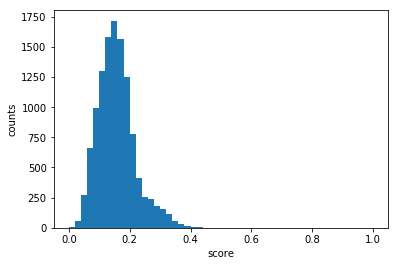

In [97]:
# check distribution
plt.hist(df['violence'], 50)
plt.xlabel('score')
plt.ylabel('counts')
plt.show()

In [98]:
# clipping large violence scores & minmax again
ix_large = df[df['violence'] > 0.43].index
df.loc[ix_large, 'violence'] = 0.43
v = np.matrix(df['violence'])
df['violence'] = scaler.fit_transform(v.T)

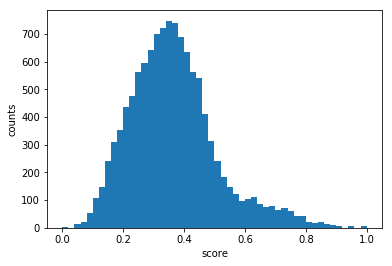

In [99]:
# check distribution
plt.hist(df['violence'], 50)
plt.xlabel('score')
plt.ylabel('counts')
plt.show()

In [100]:
train_dir = '/home/dhwon/data_hdd2/UCLA-protest/img/train/'
test_dir = '/home/dhwon/data_hdd2/UCLA-protest/img/test/'
fname2imgpath = {}
for fname in os.listdir(train_dir):
    fname2imgpath[fname] = os.path.join(train_dir, fname)
for fname in os.listdir(test_dir):
    fname2imgpath[fname] = os.path.join(test_dir, fname)

In [101]:
from PIL import Image

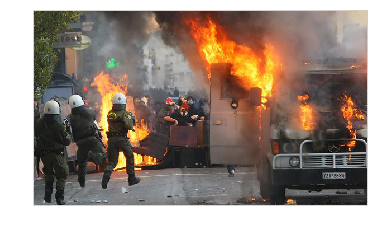

1.0


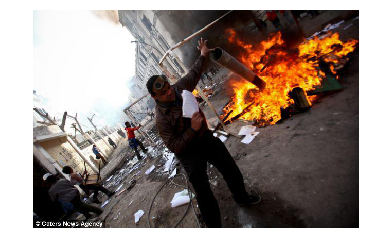

1.0


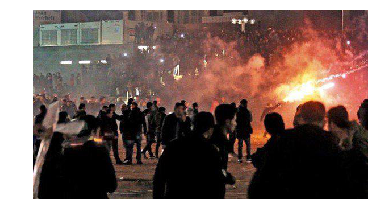

1.0


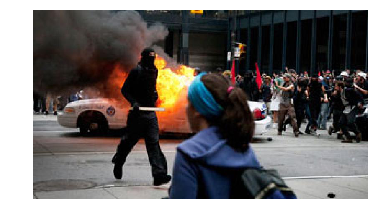

1.0


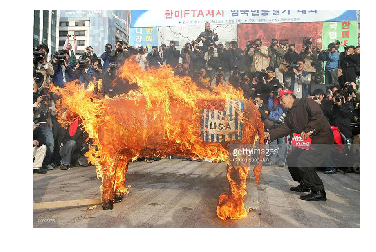

1.0


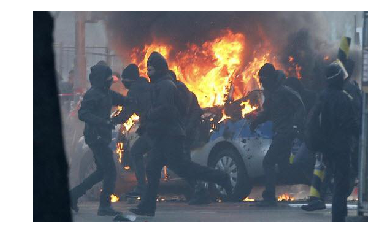

0.9954010374737969


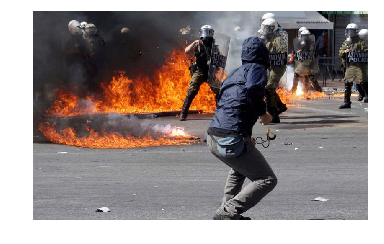

0.9884438081155597


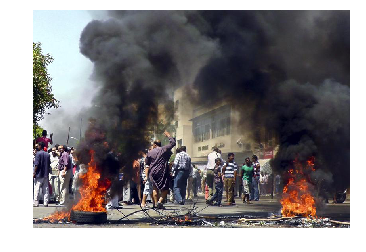

0.9840780449789074


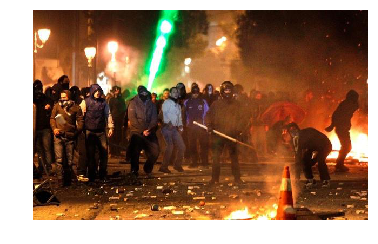

0.9699539415177157


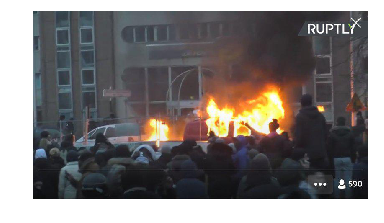

0.950315222785231


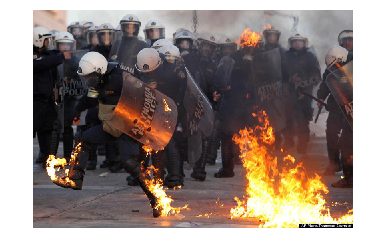

0.948382847628683


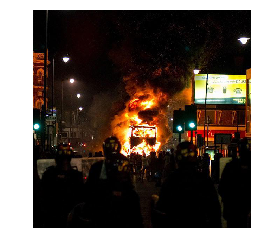

0.9461762945104953


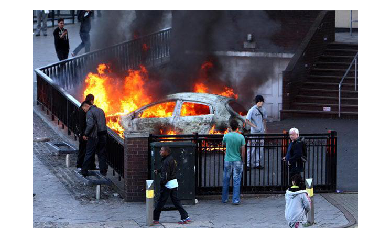

0.9438632281704016


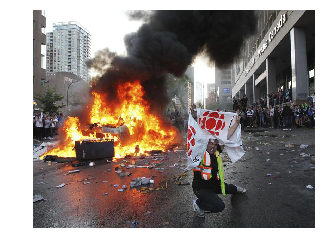

0.9422566868105321


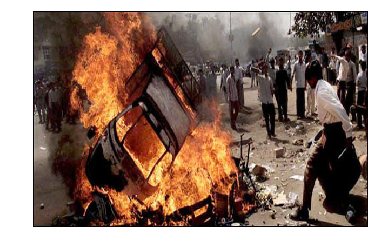

0.9420457075868112


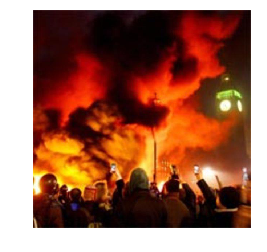

0.9417269215000761


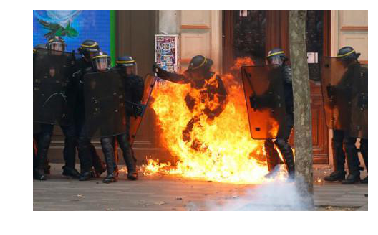

0.912967608344653


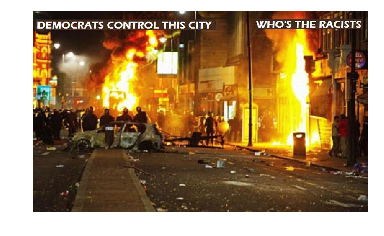

0.9094560331642161


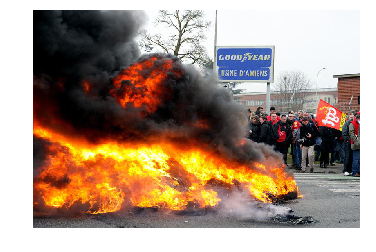

0.9056034531257572


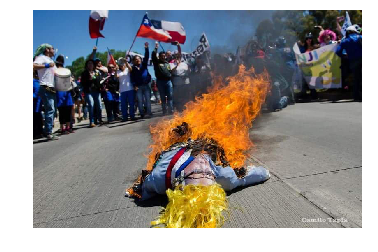

0.9026384377618506


In [107]:
# show most violents images
for row in df.sort_values(by='violence', ascending=False)[:20].iterrows():
    imgpath = fname2imgpath[row[1]['fname']]
    img = Image.open(imgpath)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    print(row[1]['violence'])

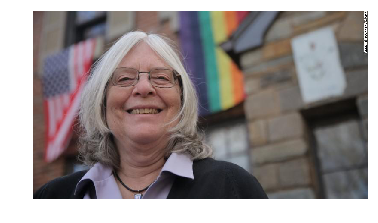

0.0


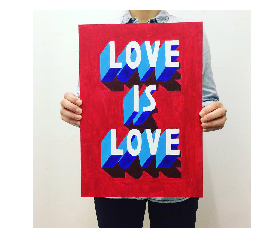

0.017026569260438943


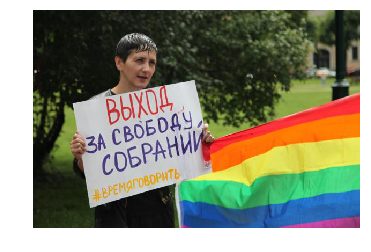

0.04059036996467515


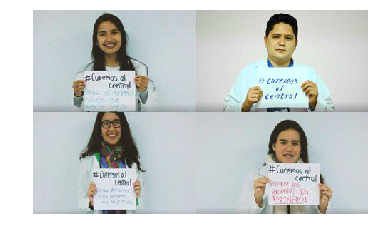

0.04186623121571069


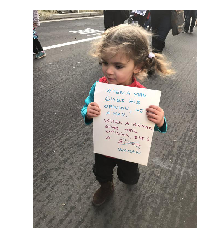

0.04298172340997683


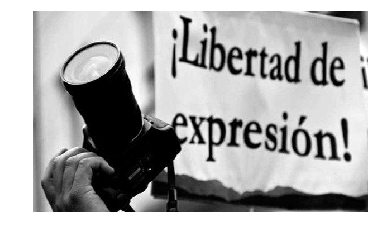

0.045158536615936364


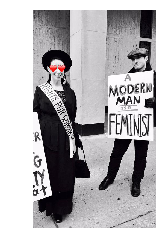

0.04738643548354158


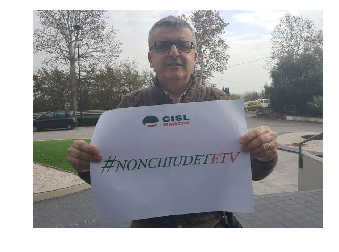

0.048516798961552025


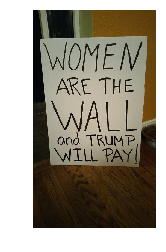

0.04942746105512943


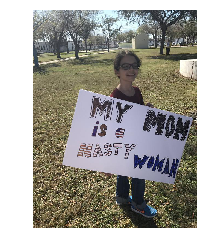

0.05222986108406228


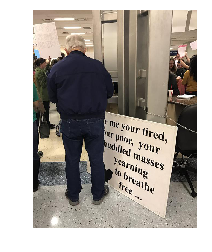

0.05328999154402154


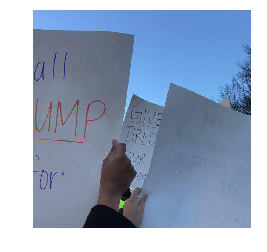

0.054400726000674304


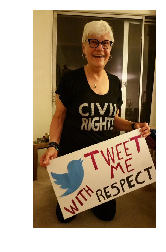

0.05648741220592195


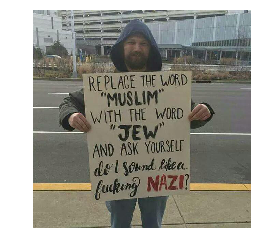

0.05775432778276061


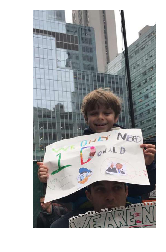

0.05959581819879813


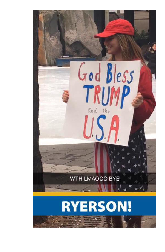

0.0623119054562837


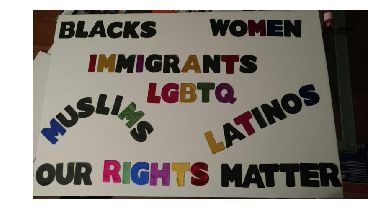

0.06360539864257539


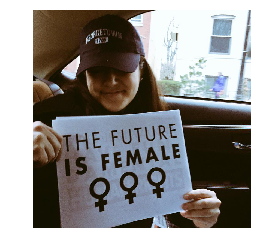

0.06391598857380348


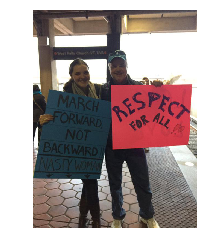

0.06437051318810373


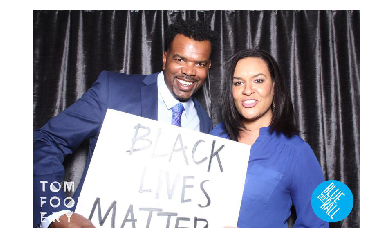

0.06583174645675208


In [108]:
# show least violents images
for row in df.sort_values(by='violence')[:20].iterrows():
    imgpath = fname2imgpath[row[1]['fname']]
    img = Image.open(imgpath)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    print(row[1]['violence'])